In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
df = pd.read_csv('data/kc_house_data.csv')

In [255]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

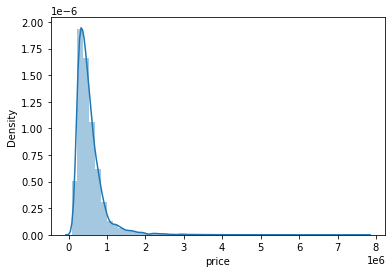

In [256]:
sns.distplot(a=df['price'])

In [257]:
# calculate summary statistics
df_mean, df_std = np.mean(df['price']), np.std(df['price'])
# identify outliers
cut_off = df_std * 3
df.drop(df[(df['price'] > df_mean + cut_off) & (df['price'] < df_mean + cut_off)].index, inplace = True)

In [258]:
df_mean, df_std

(540296.5735055795, 367359.634929548)

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

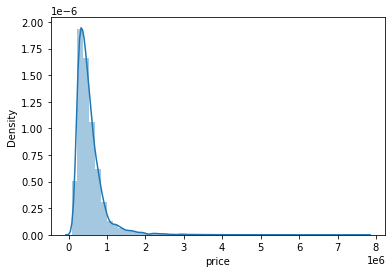

In [259]:
sns.distplot(a=df['price'])

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LogPrice', ylabel='Density'>

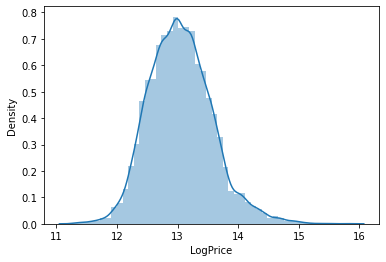

In [260]:
df["LogPrice"] = df["price"].map(lambda i: np.log(i) if i > 0 else 0)
sns.distplot(a=df['LogPrice'])

<AxesSubplot:>

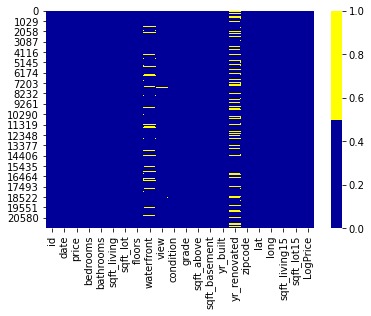

In [261]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [262]:

# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
date - 0.0%
price - 0.0%
bedrooms - 0.0%
bathrooms - 0.0%
sqft_living - 0.0%
sqft_lot - 0.0%
floors - 0.0%
waterfront - 11.0%
view - 0.0%
condition - 0.0%
grade - 0.0%
sqft_above - 0.0%
sqft_basement - 0.0%
yr_built - 0.0%
yr_renovated - 18.0%
zipcode - 0.0%
lat - 0.0%
long - 0.0%
sqft_living15 - 0.0%
sqft_lot15 - 0.0%
LogPrice - 0.0%


In [263]:
# Adding Binary Column for Basement
df['sqft_basement'].replace(to_replace='?', value='0', inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
df['has_basement'] = df['sqft_basement']
df.loc[df.has_basement > 0, 'has_basement'] = 1

In [264]:
# Converting to Datetime
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')

In [265]:
# Converting Waterfront to Binary
df['waterfront'] = df['waterfront'].fillna('0')
df['waterfront'].replace(to_replace='NO', value='0', inplace=True)
df['waterfront'].replace(to_replace='YES', value='1', inplace=True)
df['waterfront'] = pd.to_numeric(df['waterfront'],errors='coerce')

In [266]:
# Converting Grade to Numeric
df['grade'] = df['grade'].str.slice(0,2).str.strip()
df['grade'] = pd.to_numeric(df['grade'],errors='coerce')

In [267]:
# Creating Column for Renovations within last 10 years
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
df['renovated_less_10yrs'] = df['yr_renovated'] > 2010.0
df['renovated_less_10yrs'] = df['renovated_less_10yrs'].astype('int64')
df['renovated_less_10yrs'].value_counts()

0    21462
1      135
Name: renovated_less_10yrs, dtype: int64

In [268]:
# Converting condition to numeric
df['condition'].replace('Poor', '1', inplace=True)
df['condition'].replace('Fair', '2', inplace=True)
df['condition'].replace('Average', '3', inplace=True)
df['condition'].replace('Good', '4', inplace=True)
df['condition'].replace('Very Good', '5', inplace=True)
df['condition'] = df['condition'].astype(np.int64)

In [269]:
# Converting View to Numeric
df['view'].fillna('NONE', inplace=True)
df['view'].replace('NONE', '0', inplace=True)
df['view'].replace('FAIR', '1', inplace=True)
df['view'].replace('AVERAGE', '2', inplace=True)
df['view'].replace('GOOD', '3', inplace=True)
df['view'].replace('EXCELLENT', '4', inplace=True)
df['view'] = df['view'].astype(np.int64)
df['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [270]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)


(21597, 24)
id                               int64
date                    datetime64[ns]
price                          float64
bedrooms                         int64
bathrooms                      float64
sqft_living                      int64
sqft_lot                         int64
floors                         float64
waterfront                       int64
view                             int64
condition                        int64
grade                            int64
sqft_above                       int64
sqft_basement                  float64
yr_built                         int64
yr_renovated                   float64
zipcode                          int64
lat                            float64
long                           float64
sqft_living15                    int64
sqft_lot15                       int64
LogPrice                       float64
has_basement                   float64
renovated_less_10yrs             int64
dtype: object


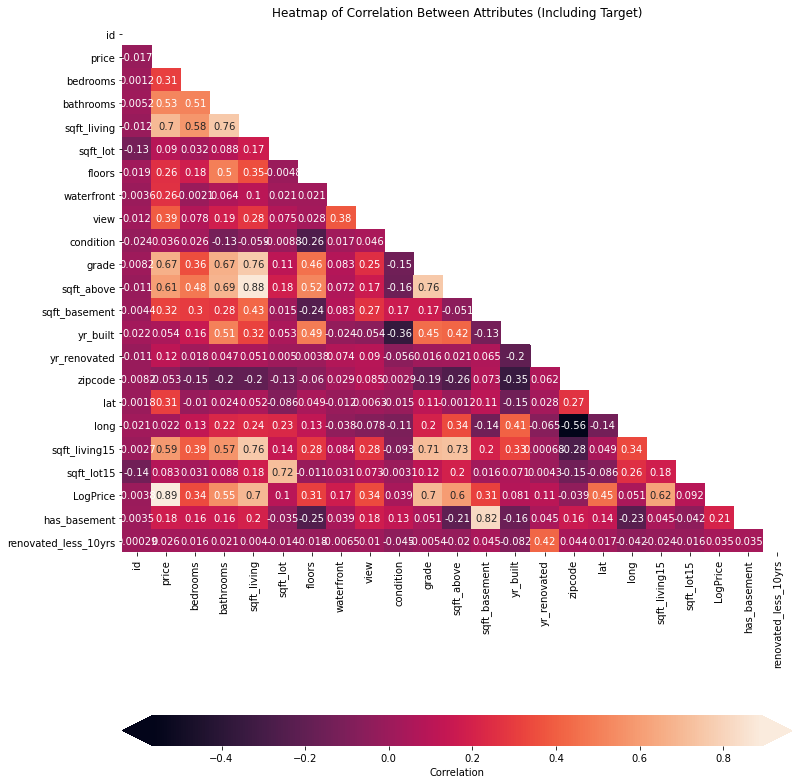

In [271]:
# Create a df with the target as the first column,
# then compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(12, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

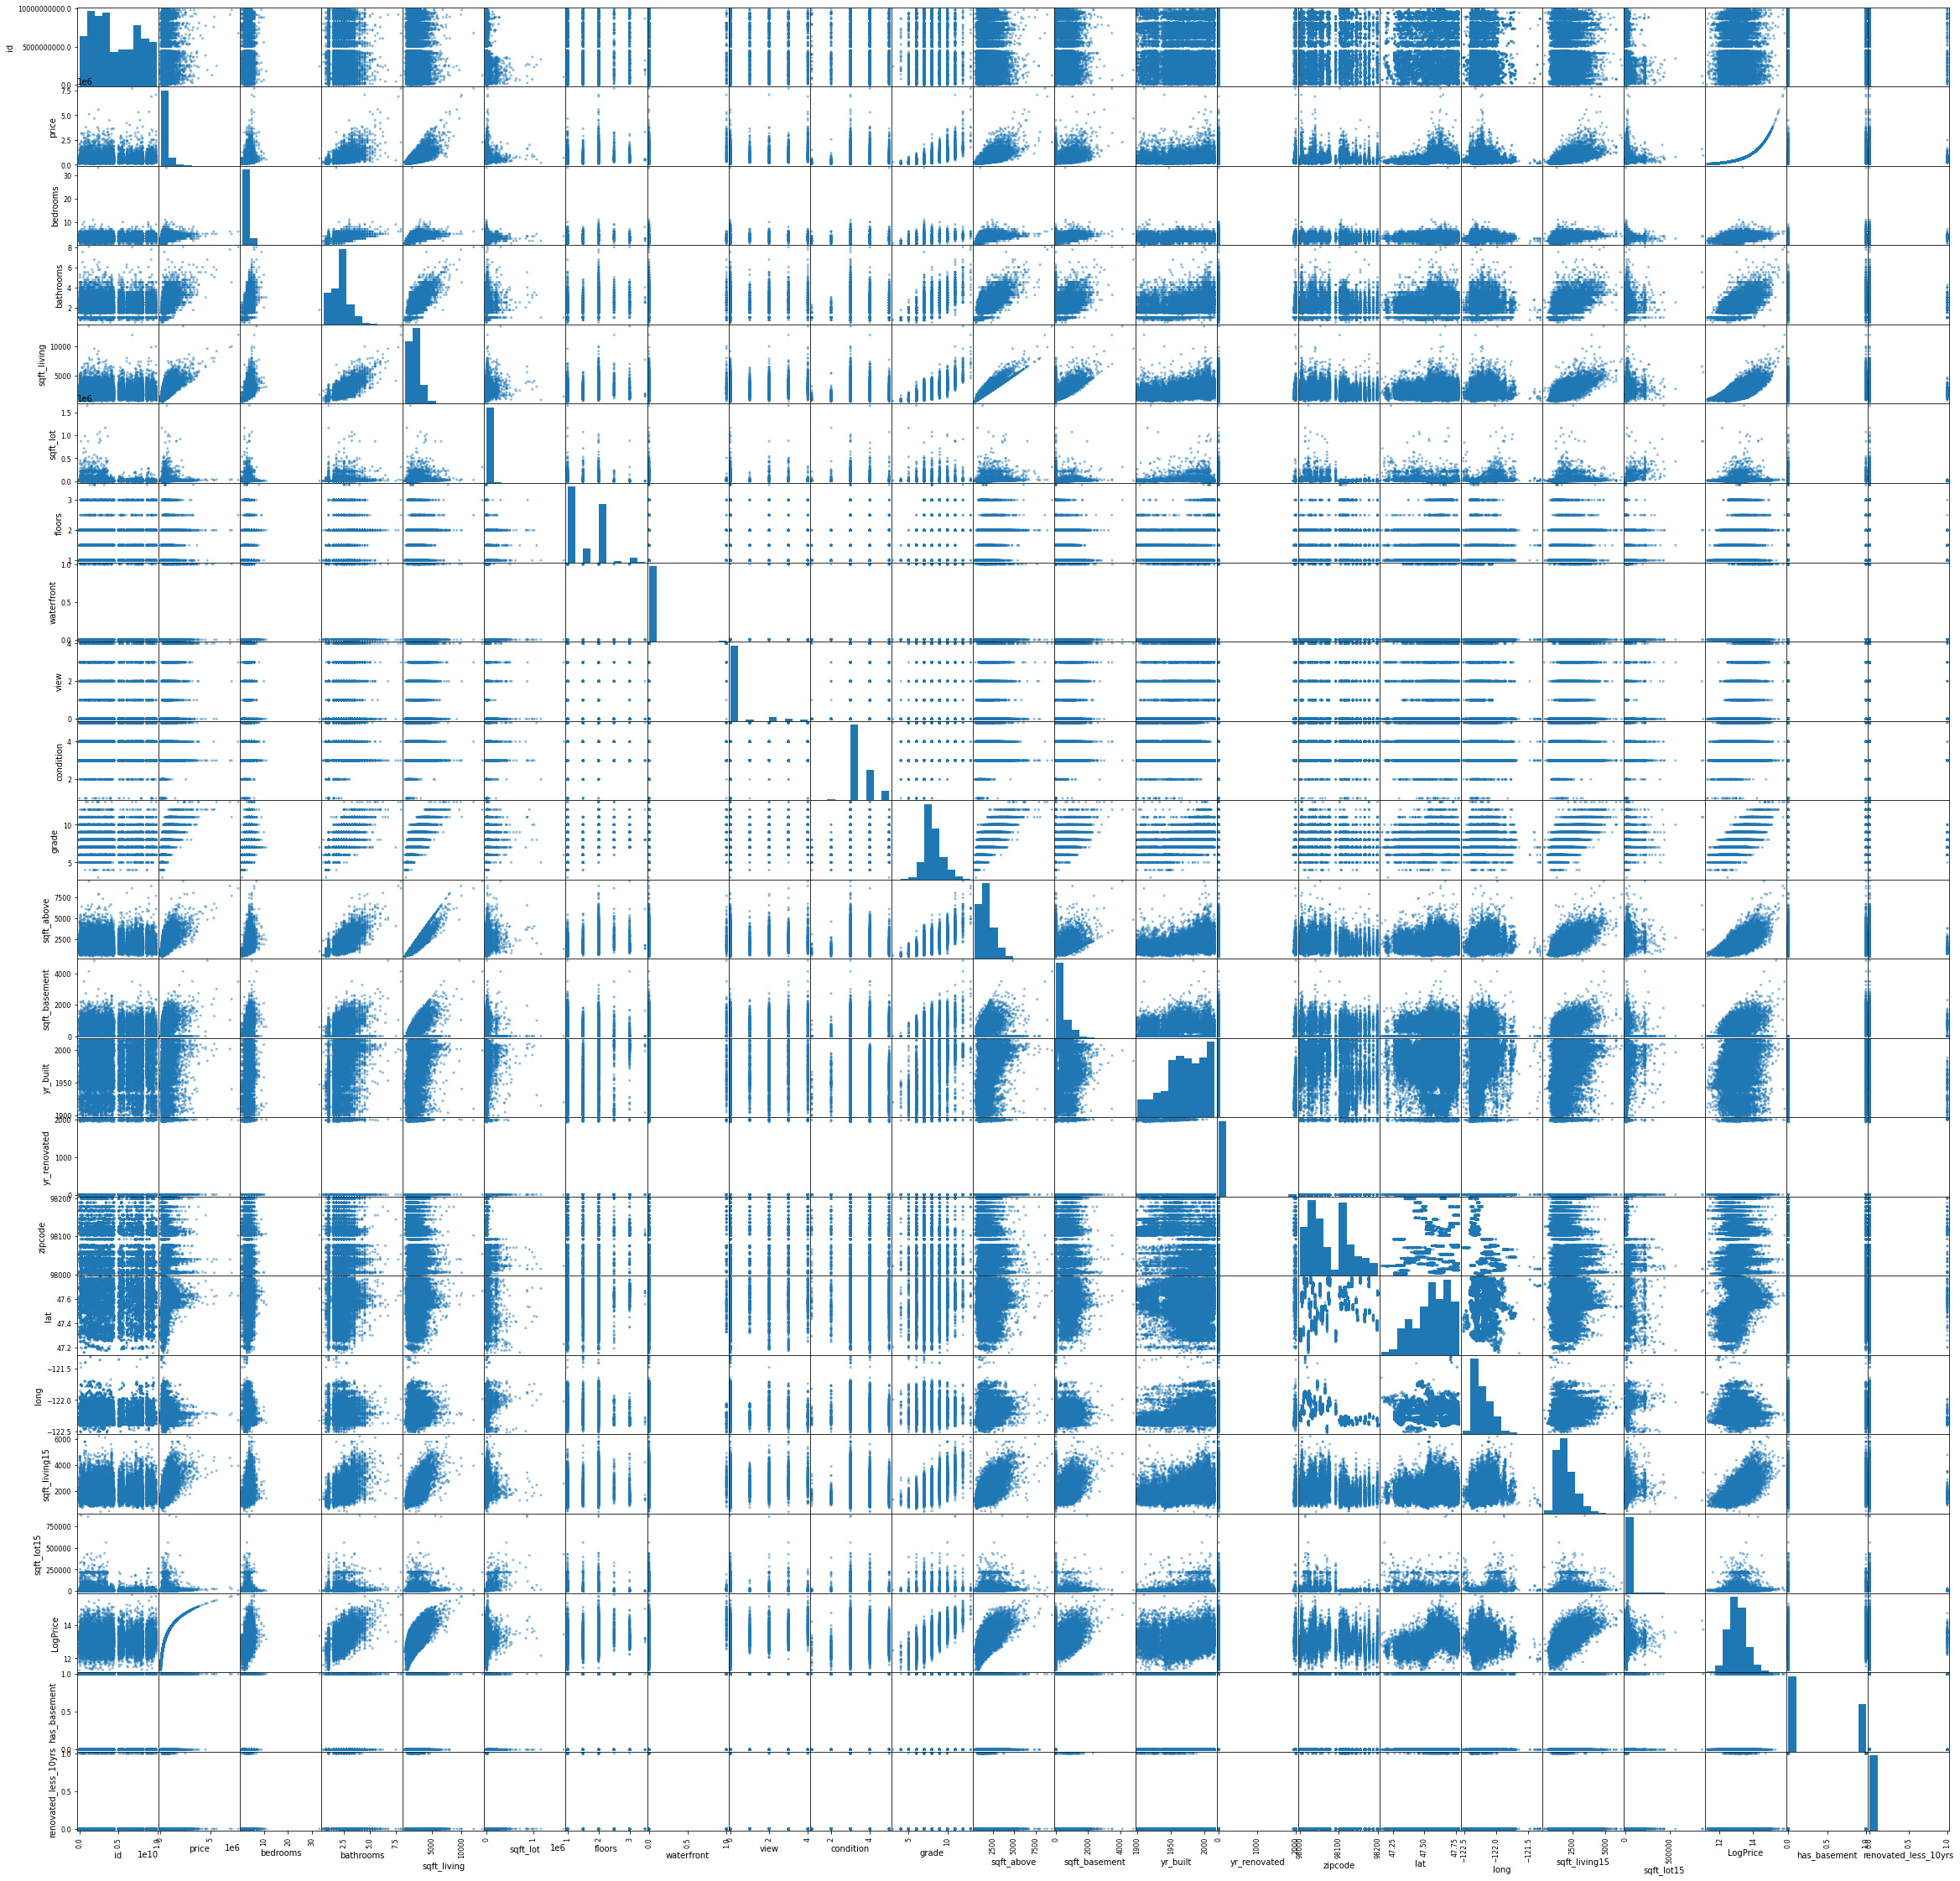

In [290]:
pd.plotting.scatter_matrix(df, figsize=[40, 40]);

In [291]:
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)


df_corr.rename(columns={0 : 'corr'}, inplace=True)
df_corr[(df_corr['corr'] > .6) & (df_corr['corr'] < 1) & df_corr['level_0'] == 'price']

,level_0,level_1,corr


In [292]:
other_cols = df.columns.drop(['price', 'date'])
formula = 'price ~ + {}'.format(' + '.join(other_cols))
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     5147.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:24:11   Log-Likelihood:            -2.8760e+05
No. Observations:               21597   AIC:                         5.753e+05
Df Residuals:                   21574   BIC:                         5.754e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             6.007e+06   2.15e+06      2.788      0.005    1.78e+06    1.02e+07
id                   -1.679e-06   3.53e-07     -4.760      0.000   -2.37e-06   -9.88e-07
bedrooms             -2.921e+04   1389.739    -21.017      0.000   -3.19e+04   -2.65e+04
bathrooms             8099.0673   2416.585      3.351      0.001    3362.381    1.28e+04
sqft_living             19.2428     13.244      1.453      0.146      -6.717      45.203
sqft_lot                -0.1325      0.035     -3.772      0.000      -0.201      -0.064
floors               -3.531e+04   2650.054    -13.325      0.000   -4.05e+04   -3.01e+04
waterfront            4.072e+05   1.33e+04     30.507      0.000    3.81e+05    4.33e+05
view                  1.839e+04   1573.533     11.690      0.000    1.53e+04    2.15e+04
condition            -8791.8174   1736.136     -5.064      0.000   -1.22e+04   -5388.863
grade                 1.164e+04   1702.652      6.838      0.000    8305.267     1.5e+04
sqft_above              77.5478     13.201      5.874      0.000      51.673     103.422
sqft_basement           95.9196     13.688      7.008      0.000      69.091     122.748
yr_built              -773.3007     54.306    -14.240      0.000    -879.745    -666.857
yr_renovated             5.0199      3.185      1.576      0.115      -1.223      11.263
zipcode               -208.2185     24.293     -8.571      0.000    -255.834    -160.603
lat                  -1.594e+05   9608.781    -16.589      0.000   -1.78e+05   -1.41e+05
long                 -1.382e+05   9669.282    -14.290      0.000   -1.57e+05   -1.19e+05
sqft_living15          -31.2645      2.551    -12.257      0.000     -36.264     -26.265
sqft_lot15              -0.2644      0.054     -4.920      0.000      -0.370      -0.159
LogPrice              5.466e+05   3983.129    137.241      0.000    5.39e+05    5.54e+05
has_basement          -5.71e+04   3891.845    -14.671      0.000   -6.47e+04   -4.95e+04
renovated_less_10yrs -4.626e+04   1.41e+04     -3.289      0.001   -7.38e+04   -1.87e+04
==============================================================================
Omnibus:                    29217.296   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18837262.421
Skew:                           7.384   Prob(JB):                         0.00
Kurtosis:                     146.927   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

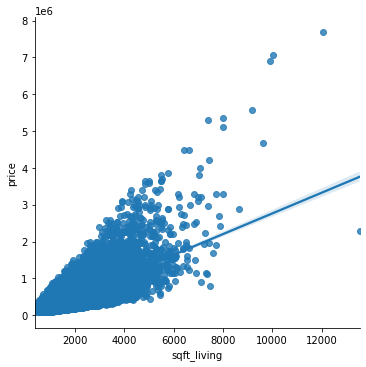

In [293]:

sns.lmplot(x='sqft_living', y='price', data=df)  

In [288]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
